In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [15,10]

In [3]:
from sklearn.datasets import load_digits

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [6]:
digits = load_digits()
X = digits.data
y = to_categorical(digits.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   train_size=0.3,
                                                   random_state=42)

In [7]:
# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Test if your model works and can process input data
print(model.predict(X_train))

[[3.03099341e-07 4.78308380e-01 3.06729198e-09 ... 3.20738927e-02
  2.18795463e-01 8.48822203e-03]
 [1.73798924e-07 4.16279584e-03 1.71208145e-10 ... 2.04572156e-02
  1.59770576e-03 2.35457197e-01]
 [2.68857502e-06 6.47054434e-01 1.69859982e-09 ... 3.42621934e-04
  6.41443359e-04 3.08080822e-01]
 ...
 [5.87069451e-08 9.49753881e-01 1.04229181e-10 ... 8.42781537e-06
  8.64669122e-03 4.14498858e-02]
 [2.08668425e-05 7.98342586e-01 3.68218545e-09 ... 1.10690935e-05
  4.20696940e-03 1.91565022e-01]
 [4.11901347e-05 2.13380132e-04 2.49348062e-07 ... 1.71232879e-01
  1.40253097e-01 6.25939310e-01]]


In [8]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

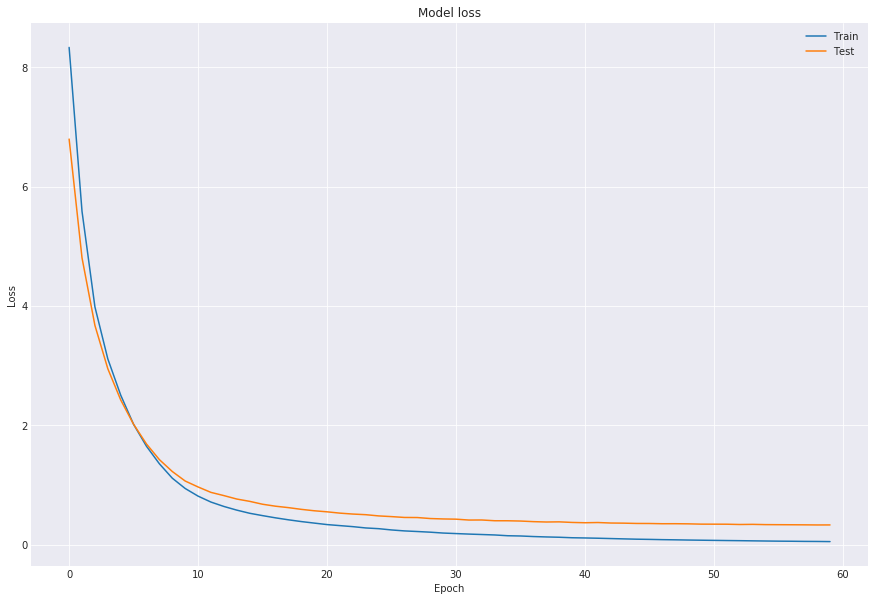

In [9]:
# Train your model for 60 epochs, using X_test and y_test as validation data
history = model.fit(X_train, y_train, epochs=60, 
                    validation_data=(X_test, y_test), verbose=0)

# Extract from the history object loss and val_loss to plot the learning curve
plot_loss(history.history['loss'], history.history['val_loss'])

In [10]:
initial_weights = model.get_weights()

In [11]:
train_sizes = np.array([50, 125, 250, 375, 502])

In [12]:
from keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='loss', 
                       patience=5)

In [14]:
train_accs = []
test_accs = []

```python

for train_size in train_sizes:
    
    #Split a fraction according to train_size
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train, 
                                                        y_train, 
                                                        train_size=train_size)
    
    #Set model initial weights
    model.set_weights(initial_weights)
    
    #Fit model on the training set fraction
    model.fit(X_train_frac, y_train_frac, epochs=100,
             verbose=0, 
             callbacks=[EarlyStopping(monitor='loss', patience=1)])
    
    #Get the accuracy for this training set function
    train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    train_accs.append(train_acc)
    
    #Get the accuracy on the whole test set
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_accs.append(test_acc)
    print('Done with size: ', train_size)```

In [15]:
def plot_results(train_accs,test_accs):
  plt.plot(train_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(train_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('Training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc="best")
  plt.show()

1258/1258 [==============================] - 0s 88us/step


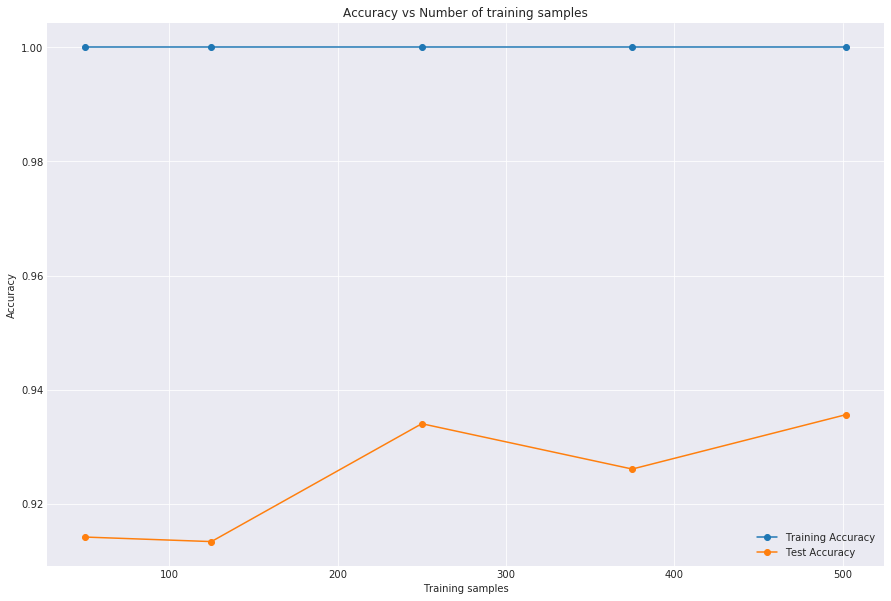

In [16]:
for size in train_sizes:
    # Get a fraction of training data (we only care about the training data)
    X_train_frac, X_test_frac, y_train_frac, y_test_frac = train_test_split(
                                                              X_train, y_train, 
                                                              train_size = size)
    # Set the model weights and fit the model on the training data
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop], verbose=0)

    # Evaluate and store the train fraction and the complete test set results
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])

# Plot train vs test accuracies
plot_results(train_accs, test_accs)

### Activation function

```python
# Set a random seed
np.random.seed(1)

# Return a new model with the given activation
def get_model(act_function):
    model = Sequential()
    model.add(Dense(4, input_shape=(2,), activation=act_funtion)
    model.add(Dense(1, activation='sigmoid'))
    return model
      
# Activation functions to try out
activations = ['relu', 'sigmoid', 'tanh']
              
# Dictionary to store results
activation_results = {}
              
# Extract val_loss history of each activation function
val_loss_per_funct = {k:v.history['val_loss'] for k,v in activation_results.items()}
              
# Turn the dictionary into a pandas dataframe
val_loss_curve = pd.DataFrame(val_loss_per_funct)
              
# Plot the curves
val_loss_curves.plot(title='Loss per Activation function')
```

In [24]:
irr_data = pd.read_csv('data/irrigation_machine.csv', index_col=0)
irr_data.head(3)
sensors = irr_data.iloc[:,0:20]
sensors.head(3)
parcels = irr_data.iloc[:,20:]
parcels.head(3)
X_train, X_test, y_train, y_test = train_test_split(sensors,
                                                   parcels,
                                                   test_size=0.3,
                                                   random_state=73)

In [25]:
def get_model(act_function):
    model = Sequential()

    # Add a hidden layer of 64 neurons and a 20 neuron's input
    model.add(Dense(64, input_shape=(20,), activation=act_function))

    # Add an output layer of 3 neurons with sigmoid activation
    model.add(Dense(3, activation='sigmoid'))

    # Compile your model with adam and binary crossentropy loss
    model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
    return model

In [27]:
# Set a seed
np.random.seed(27)

# Activation functions to try
activations = ['relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model
  history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test), verbose=0)
  activation_results[act] = history

In [30]:
val_loss_per_funct = {k:v.history['val_loss'] for k,v in activation_results.items()}
val_acc_per_funct = {k:v.history['accuracy'] for k,v in activation_results.items()}

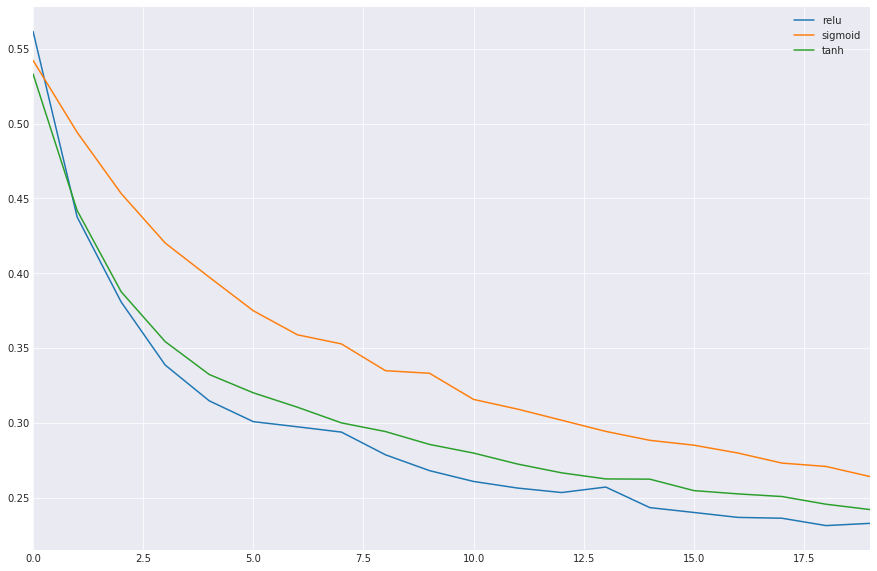

In [44]:
val_loss = pd.DataFrame(val_loss_per_funct)
val_loss.plot()
plt.show()

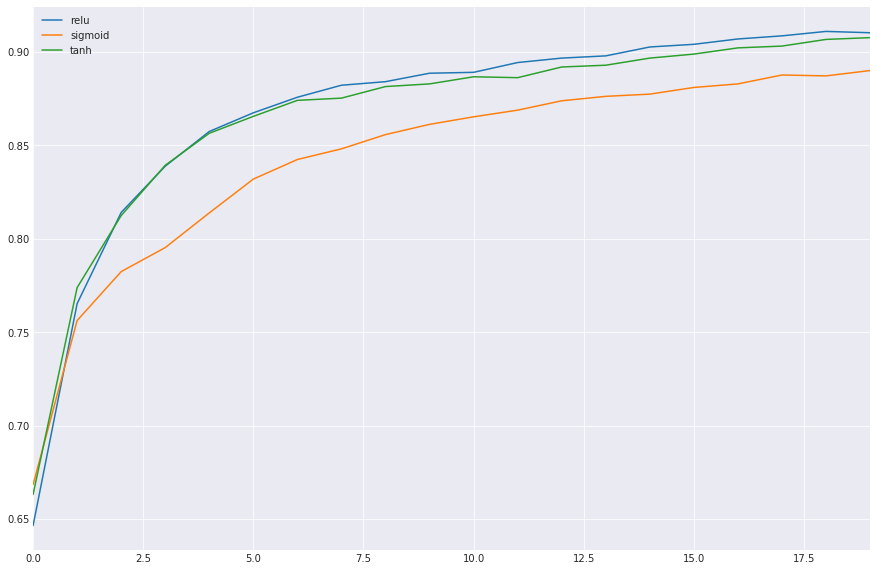

In [45]:
val_acc = pd.DataFrame(val_acc_per_funct)
val_acc.plot()
plt.legend(loc='best')
plt.show()

### Mini-batches
- Advantages
    - Networks train faster (more weight updates in same amount of time)
    - Less memory requiered, can train on huge datasets
    - Noise can help networds reach a lower error, escaping local minima
- Disadvantages
    - More iterations need to be run
    - Need to be adjusted, we need to find a good batch size 
    
### Batch size in Keras
Standardiztion = $\frac{data~-~mean}{standard~deviation}$

![batch](slides/batch.png)

### Batch normalization advantages
- Improves gradient flow
- Allows higher learning rates
- Reduces dependence on weight initializations
- Acts as an unintended form of regularization
- Limits internal covariate shift

```python
# Import BatchNormalization fro keras layers
from keras.layers import BatchNormalization

# Instantiate a Sequential model
model = Sequential()

# Add an input layer
model.add(Dense(3, input_shape=(2,), activation='relu')
          
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
          
# Add an output layer
model.add(Dense(1, activation='sigmoid'))
```

In [46]:
def get_model():
  model = Sequential()
  model.add(Dense(4,input_shape=(2,),activation='relu'))
  model.add(Dense(1,activation="sigmoid"))
  model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
  return model

In [47]:
import numpy as np
X_train = np.array([[-6.71864535e-01, -7.01386826e-01],
       [ 1.10115229e+00,  5.12388078e-01],
       [ 1.20930054e-01,  9.36612054e-01],
       [ 1.60372450e-02, -2.39062286e-01],
       [ 2.53592610e-01, -1.23128293e-01],
       [-1.71466488e-01,  3.76398515e-02],
       [-1.25170301e-01, -1.28904510e-01],
       [-7.98022428e-01, -6.90050580e-01],
       [-5.19315737e-02, -2.17685461e-01],
       [ 1.06830484e-01, -9.90491265e-02],
       [ 1.60277564e-02,  1.77893651e-01],
       [-6.17554773e-01, -4.97363262e-01],
       [ 1.58386369e-01, -1.71818402e-01],
       [ 2.85606451e-02,  1.02326478e-01],
       [-1.75767101e-01, -1.53095940e-01],
       [-1.23926055e-02,  1.32241259e-01],
       [-4.54679096e-01, -9.20853213e-01],
       [ 8.13803133e-01, -3.20819042e-01],
       [-1.58529981e-01,  1.72501107e-01],
       [ 2.62549996e-01, -6.48142912e-02],
       [-7.28981467e-02, -8.98655451e-02],
       [ 3.53617865e-02,  2.47484694e-01],
       [-5.02531251e-01,  7.34807140e-01],
       [-6.39301099e-01,  6.92339715e-01],
       [-6.27370555e-01,  6.88756454e-01],
       [-2.74394589e-02,  3.14170818e-01],
       [ 1.55086715e-01, -2.39510444e-01],
       [ 4.50649127e-02,  8.95546617e-02],
       [ 2.43864586e-02, -2.12923979e-01],
       [-6.25014582e-02, -1.06406405e-02],
       [ 7.49026702e-01,  6.75225301e-01],
       [-1.01429157e+00,  2.16806305e-01],
       [-8.38037041e-01, -4.71240502e-01],
       [ 4.04027842e-01,  2.04671054e-01],
       [-8.71615133e-01,  3.92821655e-01],
       [-1.61517984e-01, -2.65069416e-01],
       [-2.50790683e-01, -1.49180571e-02],
       [-1.23155762e-01,  1.03130732e+00],
       [-6.90962709e-01, -7.63487257e-01],
       [ 1.56560946e-01,  1.92753506e-01],
       [-7.82654083e-01,  7.80658331e-01],
       [ 3.39722275e-01,  8.53690017e-01],
       [-9.56725338e-01, -2.46679042e-02],
       [ 7.72818676e-02, -2.60631940e-01],
       [ 1.03726663e-01, -1.44125427e-01],
       [-4.21772513e-03, -2.92142991e-01],
       [ 3.90338131e-02,  1.20117668e-01],
       [ 2.73929189e-01, -6.87692683e-02],
       [-7.87208614e-01,  3.06846720e-01],
       [-1.45257517e-01,  1.42744227e-01],
       [-8.66359065e-01,  5.07995155e-01],
       [ 5.24839884e-02, -5.06837911e-02],
       [-2.48099249e-01, -4.23079835e-02],
       [ 5.38336606e-01,  9.64693672e-01],
       [-4.69222460e-01,  7.79809471e-01],
       [ 3.68613921e-01, -9.51356728e-01],
       [ 2.81667707e-02, -1.47992810e-01],
       [-2.45060885e-01,  1.22273012e-02],
       [ 4.79042111e-03,  2.19178210e-01],
       [-9.49584642e-02, -1.96543848e-01],
       [ 6.20525259e-01,  9.21615357e-01],
       [-7.48462012e-02, -2.76078333e-01],
       [-2.22646973e-01,  1.86703807e-01],
       [-2.26976201e-01,  4.17518779e-01],
       [ 1.89667308e-01, -3.94928566e-02],
       [ 9.86034153e-01, -2.57110052e-01],
       [-7.98411313e-01,  5.01432669e-01],
       [-2.21358609e-01, -7.31288133e-02],
       [-3.86962561e-01,  1.53270314e-01],
       [ 1.66878450e-01,  2.52150578e-01],
       [ 1.78904073e-01,  6.69790638e-02],
       [-2.93432414e-01, -8.15242877e-01],
       [-6.52537101e-01,  9.12459091e-01],
       [ 2.62056794e-02, -2.33300130e-01],
       [-6.89603048e-01, -7.46608715e-01],
       [ 2.53556828e-01, -1.09431010e+00],
       [ 9.25242906e-01, -4.16620756e-01],
       [-2.62553085e-03,  7.01705032e-02],
       [-7.87378490e-01, -3.93679059e-01],
       [ 8.91338040e-01, -4.65459571e-01],
       [-2.69055456e-01, -9.91328447e-01],
       [ 8.16953402e-01, -8.44754809e-01],
       [-2.09020947e-01, -3.82303463e-01],
       [-1.30575707e-01,  8.19921829e-02],
       [ 1.00758941e+00, -4.85794633e-01],
       [-1.73537909e-01, -2.11969808e-01],
       [ 1.01608297e+00,  1.32712433e-01],
       [-1.22189225e-01, -1.04007985e+00],
       [-6.17516110e-01, -7.86176109e-01],
       [ 5.12087332e-02,  8.87344739e-02],
       [-3.17731312e-01,  5.98012291e-02],
       [ 1.45073161e-03, -2.00811488e-01],
       [-8.47572632e-01,  3.32039426e-01],
       [-1.66472921e-01, -2.24874741e-01],
       [ 1.58425837e-01, -2.67796963e-01],
       [ 1.96960093e-01,  1.08922581e-01],
       [ 6.15857861e-01,  8.55536381e-01],
       [-1.27799046e-01, -1.27983213e-02],
       [-8.30490531e-02, -1.84823697e-01],
       [ 1.10476210e+00,  3.79461324e-01],
       [ 2.94041032e-01,  1.92606557e-01],
       [-6.64376240e-01,  7.40023496e-01],
       [ 2.35269675e-02, -9.10794263e-02],
       [-1.42234030e-01, -5.64050358e-03],
       [-9.59004876e-02,  4.17627513e-02],
       [ 6.47143704e-01, -6.88247545e-01],
       [ 2.42864622e-01, -1.12865929e-01],
       [-3.59834403e-01,  7.98898511e-01],
       [ 1.35883293e-01,  1.24090913e-01],
       [ 8.10879661e-01, -8.28996030e-01],
       [-1.08470733e+00,  3.65792851e-01],
       [ 1.15411352e+00,  1.87965569e-01],
       [ 1.53368012e-01, -1.90477362e-01],
       [ 3.44359100e-01,  1.22818651e-01],
       [ 8.96704436e-01,  7.18532437e-01],
       [ 2.01978733e-01, -3.73266419e-02],
       [ 7.86163896e-02,  3.53593986e-01],
       [ 3.97886478e-01,  2.05737092e-01],
       [ 6.23121160e-02,  8.13021548e-01],
       [-6.32915279e-03,  9.91296626e-01],
       [-1.70912128e-01,  2.18386422e-01],
       [ 1.17021392e-01, -1.37104220e-03],
       [ 9.96463571e-01,  2.96500989e-01],
       [ 4.06719511e-03,  1.31172141e-01],
       [ 1.14253462e-01,  4.68329573e-02],
       [-1.94081715e-01,  9.54458079e-02],
       [ 6.80070625e-01,  4.51966596e-01],
       [-2.03138005e-01, -7.80003446e-02],
       [-9.58410416e-02,  2.17712787e-01],
       [ 1.10813965e-01, -3.07529641e-01],
       [ 8.23212091e-01, -4.08079424e-01],
       [ 6.05450650e-03,  2.54153064e-01],
       [ 1.78598552e-01,  2.01404646e-01],
       [ 2.35557820e-02,  1.44786798e-01],
       [ 8.80249433e-01, -5.14088981e-01],
       [-5.62639729e-01, -6.40657834e-01],
       [-4.61396054e-02,  1.03821602e+00],
       [-8.14348358e-02,  1.03428523e+00],
       [-1.59364492e-01, -1.71966733e-01],
       [ 1.40155648e-01,  9.75289202e-02],
       [-1.26727338e-01,  3.05472985e-01],
       [ 2.00898614e-02, -2.87929557e-01],
       [-9.49248495e-01, -7.77785366e-01],
       [ 2.81537949e-01,  1.18836625e+00],
       [ 1.15039284e+00, -2.51530519e-01],
       [-6.53251737e-01,  5.01673589e-01],
       [-3.16385848e-02,  5.32694109e-03],
       [ 8.78895492e-02,  7.06975385e-02],
       [ 1.46448925e-01, -1.26168552e-01],
       [ 7.79048591e-02,  3.21076456e-01],
       [ 8.32533790e-01, -5.18974299e-01],
       [ 1.05601750e+00,  2.94656344e-02],
       [-6.45680686e-01,  6.80969101e-01],
       [-6.17749334e-01, -6.86912504e-01],
       [ 1.65457435e-01, -2.14120688e-01],
       [-1.22491543e+00,  1.76032380e-01],
       [ 4.86703771e-01, -9.94461346e-01],
       [-3.33998822e-01,  1.10568054e-01],
       [ 1.11837074e-01,  2.67430179e-01],
       [ 1.01859795e+00, -1.94234355e-01],
       [-6.75852524e-01,  5.48717654e-01],
       [-8.15473388e-02,  1.52684543e-01],
       [-1.83452414e-01,  5.26088514e-02],
       [ 7.36189172e-02,  8.96514477e-02],
       [ 4.96025621e-01,  8.87114931e-01],
       [ 1.53789919e-01,  9.87774875e-01],
       [-7.13548246e-01,  8.87446560e-01],
       [ 5.98531024e-02, -1.90025297e-01],
       [-9.48278695e-02,  1.10647133e+00],
       [-1.57982448e-01,  1.51314930e-01],
       [-3.74126454e-02, -8.79595321e-03],
       [-1.01086980e-01,  2.89329527e-01],
       [-6.79210487e-02,  1.43307234e-01],
       [-1.00857907e+00,  4.31903196e-01],
       [-3.33210633e-01, -8.46969881e-01],
       [ 1.25435928e+00, -2.21586729e-01],
       [ 8.68941693e-01,  2.60947547e-01],
       [-9.05289030e-01, -2.25056666e-01],
       [ 2.47444821e-02, -7.13534400e-02],
       [ 8.17143422e-01,  3.72646412e-01],
       [-4.61864207e-02, -1.82096646e-01],
       [-7.07656612e-01,  7.60007462e-01],
       [ 8.19966013e-01, -7.74415056e-01],
       [ 1.64215139e-01,  2.12049760e-01],
       [ 1.36869189e-02,  1.33510038e-01],
       [ 5.88658304e-01, -9.23683949e-01],
       [ 3.52829767e-01, -8.41873416e-02],
       [-5.41069754e-02,  1.41544730e-02],
       [ 9.49761256e-02,  1.06746415e-01],
       [-1.88865169e-01,  1.47624275e-01],
       [ 1.32067893e-01, -3.27881163e-01],
       [-1.80530669e-02,  2.99656857e-01],
       [-4.24867786e-03,  3.26207105e-02],
       [ 3.98868995e-02, -8.17897009e-01],
       [-1.19850434e-01, -1.10120203e+00],
       [ 1.99759431e-01, -7.59079135e-02],
       [-7.16923546e-02, -7.61654969e-02],
       [ 9.62634015e-01, -6.11651111e-02],
       [ 3.83968318e-02, -1.40987578e-02],
       [-6.13900015e-01, -8.00135048e-01],
       [-2.22958669e-01,  2.38571073e-01],
       [ 1.05930894e+00, -4.32453600e-01],
       [ 5.73965563e-01, -7.09942541e-01],
       [-9.15450118e-01, -6.23045497e-01],
       [-6.34208635e-01,  8.34673797e-01],
       [-9.09510371e-01, -4.42772796e-01],
       [-5.76360724e-01, -6.91701901e-01],
       [-3.34945213e-01,  8.55771640e-02],
       [ 3.62464475e-01,  1.07526049e-01],
       [ 2.25917687e-01, -1.09801081e-02],
       [ 5.39159585e-02, -7.69933486e-02],
       [-1.24316808e-01,  3.31050832e-01],
       [ 1.56284675e-02,  2.01164268e-01],
       [ 4.18508722e-01,  1.00009814e+00],
       [ 1.06252929e-01,  2.97069788e-01],
       [ 8.81764067e-01, -3.45633874e-01],
       [-2.54921307e-02,  3.61027079e-01],
       [-9.37090474e-01,  5.43624123e-01],
       [ 1.65844090e-01, -1.05348510e-01],
       [-1.53509397e-01,  1.10218824e-01],
       [-8.27004911e-02,  1.67829813e-01],
       [-6.03658059e-02,  5.46378968e-02],
       [-3.37538316e-02,  2.09273194e-01],
       [ 1.38198743e-01, -4.72490557e-02],
       [-3.68921077e-02,  2.16215746e-01],
       [-7.96259822e-02, -1.27107729e-01],
       [ 8.42459957e-01, -6.08095010e-01],
       [ 1.07950816e+00,  4.66511755e-01],
       [-1.86204856e-01,  1.07683108e-01],
       [-2.32517378e-01, -1.93789485e-01],
       [-2.58965870e-01, -6.71968895e-02],
       [ 7.72121528e-02, -2.53828912e-01],
       [-3.66328663e-02,  6.41825382e-02],
       [-3.25479996e-01,  1.07628043e+00],
       [ 1.25649129e-01, -1.10323341e+00],
       [ 4.09500785e-01,  9.03241025e-01],
       [ 6.49172919e-02, -1.16153466e-01],
       [-4.65102300e-01,  1.13418685e+00],
       [-2.18970608e-01,  6.08448108e-02],
       [-7.83972663e-01,  5.75309594e-01],
       [-3.93006512e-03, -3.54885417e-01],
       [ 1.02795608e+00, -1.39583929e-02],
       [-1.03102174e+00, -6.25383059e-04],
       [-1.23720517e-01,  1.91732308e-01],
       [ 7.19567906e-01, -6.93617341e-01],
       [-3.92919314e-01,  1.07220561e+00],
       [-3.70555208e-02,  1.67030052e-01],
       [ 2.34262422e-01, -3.03664692e-01],
       [ 1.33155795e-01, -8.56213763e-02],
       [ 3.85775404e-02,  1.10450731e+00],
       [-5.46983539e-03,  2.08980445e-01],
       [-2.43430384e-01,  1.01576779e+00],
       [ 7.94368965e-02,  2.88232901e-01],
       [-1.05785629e-01,  1.61759995e-01],
       [ 1.89638194e-01,  1.78615384e-02],
       [-3.40337784e-02,  9.29348806e-01],
       [ 7.36658141e-01, -6.27181682e-01],
       [ 3.38158351e-02, -1.97717882e-01],
       [ 1.56938553e-01, -4.31607283e-04],
       [ 4.51558736e-01, -7.06185399e-01],
       [ 8.76810815e-02, -4.11108435e-02],
       [ 1.80460527e-01, -1.08323039e+00],
       [-9.97441077e-01, -1.02865414e-02],
       [ 1.20058889e-01,  1.79871034e-01],
       [ 2.44676016e-01,  8.80167177e-03],
       [-8.70767610e-02, -1.04339513e-01],
       [-1.38663708e-01, -1.52773403e-01],
       [-2.28494685e-01,  1.13088934e+00],
       [ 1.05442904e+00,  1.07328300e-01],
       [ 2.86702449e-01, -9.99426142e-01],
       [-3.41845646e-01, -1.64088818e-01],
       [ 9.27233914e-01,  3.36146180e-01],
       [-1.17295508e-01,  6.66830137e-02],
       [-2.23183731e-01,  9.65657689e-01],
       [ 4.82894277e-01, -7.93470203e-01],
       [ 6.38769647e-01, -6.87581179e-01],
       [ 7.55247683e-01, -5.38378647e-01],
       [ 3.15283318e-01,  1.91865636e-01],
       [-1.09503047e-01,  9.34120595e-02],
       [ 2.30942022e-01, -8.23227296e-02],
       [-1.06898756e+00, -4.63718729e-01],
       [-3.43357895e-01, -8.35949103e-01],
       [-2.75913048e-01, -1.10179798e+00],
       [ 7.25369047e-01,  8.61746995e-01],
       [-2.21341850e-01, -2.71257494e-02],
       [-2.88810149e-01, -9.81725873e-01],
       [ 9.02385005e-01,  4.34352732e-01],
       [-3.69038158e-01, -6.35591833e-02],
       [-9.07763976e-01, -6.16663237e-01],
       [-2.37763066e-02, -1.22471308e-01],
       [-1.95877385e-01, -2.21875178e-01],
       [-2.96219518e-02, -1.15109870e+00],
       [-1.02141894e-01, -1.38908312e-01],
       [-3.56770977e-01,  1.28305793e-01],
       [ 5.63932572e-01,  8.82003925e-01],
       [ 6.20782775e-01,  8.27034296e-01],
       [ 7.94427863e-02, -1.46918915e-01],
       [ 8.83064993e-02, -3.02852509e-01],
       [ 3.63770283e-02,  1.12242733e-01],
       [ 5.14056130e-02, -1.10366128e+00],
       [ 6.33692345e-01,  5.34740632e-01],
       [ 8.68505754e-01,  3.14792638e-01],
       [ 1.08220523e-01, -2.64395887e-01],
       [ 3.03663681e-01,  1.09866240e+00],
       [ 8.99130127e-01,  2.60493068e-03],
       [ 2.25099672e-01, -1.39888812e-01],
       [-8.97791909e-01, -8.54027171e-01],
       [ 8.89459836e-01,  5.64214311e-01],
       [-9.63902459e-01,  4.04309659e-01],
       [ 2.44260209e-01, -3.34026221e-01],
       [ 4.08558667e-02, -1.07262645e-01],
       [ 7.79270421e-03, -1.70574295e-01],
       [-1.52678760e-01, -3.61174954e-01],
       [ 3.64819421e-01, -8.33721758e-01],
       [ 9.00566545e-01,  3.64667997e-01],
       [-3.17731395e-01, -2.30164481e-01],
       [ 5.30239095e-01,  8.27348913e-01],
       [ 9.11184893e-01,  6.53037931e-01],
       [ 1.00035933e+00, -5.41979771e-02],
       [ 7.64657245e-01,  4.81284908e-01],
       [ 2.18008835e-01, -1.52074977e-01],
       [-2.72843858e-01,  7.00286190e-02],
       [ 9.54654415e-01,  4.93408472e-01],
       [ 4.40498387e-01,  1.18915392e+00],
       [-4.17337704e-01, -1.11040135e+00],
       [ 1.06908218e+00, -5.84191144e-01],
       [ 9.86982044e-01,  4.20542121e-01],
       [-9.78961425e-01, -3.12660627e-01],
       [ 2.90001517e-01, -1.09372851e-01],
       [ 5.79222630e-03, -1.07899324e+00],
       [-5.68662563e-01, -6.45941944e-01],
       [-4.39736458e-02,  1.23807552e-01],
       [-2.22795366e-01, -1.23987445e-02],
       [ 7.39984543e-02,  9.12520228e-01],
       [-6.80204181e-01, -5.23834129e-01],
       [-1.43600460e-01, -8.73549916e-02],
       [ 3.64675963e-01, -9.18191525e-01],
       [-1.10688406e-01, -1.48454760e-01],
       [-2.91923562e-01,  7.35984672e-01],
       [-2.23465609e-02,  1.03299859e+00],
       [-9.65274887e-02, -3.52203854e-01],
       [-6.96395858e-01, -6.95092638e-01],
       [ 2.84526953e-01,  6.14275201e-02],
       [-1.00537758e+00, -1.22368532e-01],
       [-1.46947950e-01,  3.14831757e-01],
       [-1.20946406e+00,  9.50448296e-03],
       [ 7.02426279e-02, -9.28938229e-02],
       [ 1.07608104e-01, -3.03461197e-02],
       [ 2.30600104e-02, -2.01698504e-01],
       [-8.33212887e-01, -2.29298048e-01],
       [-4.63409374e-02,  7.03061049e-02],
       [-6.86510076e-01,  9.70710390e-01],
       [-1.53858475e-02,  2.91434090e-01],
       [ 2.99131016e-02,  1.05280431e-01],
       [ 4.46550269e-01,  8.10621465e-01],
       [-2.14254826e-01,  5.15239170e-03],
       [-1.08727247e+00,  3.95198198e-01],
       [-1.39267481e-02, -1.51266185e-01],
       [ 5.60518421e-01, -7.34934073e-01],
       [ 2.41045715e-01, -1.62821895e-01],
       [ 9.31982078e-01,  1.78455730e-01],
       [-3.55753020e-01,  7.48347876e-01],
       [-8.09175110e-01,  2.89498419e-02],
       [-2.83966314e-01,  8.04505098e-02],
       [ 3.43740487e-02, -2.39022638e-01],
       [-8.91493777e-01,  4.68770405e-01],
       [-9.84679364e-01,  1.93349054e-01],
       [-1.00341859e+00, -1.30073686e-01],
       [ 4.26313145e-01,  8.79652991e-02],
       [ 1.16330867e-01, -5.51418423e-03],
       [-8.71613044e-01, -2.31293277e-01],
       [-1.56152266e-02,  2.24652499e-02],
       [ 1.16536330e-01, -3.57925434e-01],
       [ 1.12436357e-01, -9.05401797e-02],
       [ 1.39205826e-01,  9.90010298e-02],
       [-3.73503056e-01,  2.01157745e-01],
       [-4.95532830e-02,  1.77952167e-01],
       [ 2.31016913e-01, -2.97973682e-02],
       [ 2.42655408e-01,  3.83196035e-02],
       [ 6.04488984e-01,  8.54830439e-01],
       [ 6.44748890e-01,  8.80434883e-01],
       [-1.39435192e-01,  9.36492098e-01],
       [-7.39840208e-01, -7.42063901e-01],
       [-1.23477581e-01, -8.81784328e-01],
       [-1.53125630e-02,  2.84903935e-02],
       [ 9.26264871e-01, -1.41146335e-02],
       [ 3.49708114e-02, -2.60943106e-02],
       [ 8.18787879e-02, -1.87450304e-01],
       [ 2.54058243e-02,  1.05727583e+00],
       [-1.14832338e-01,  8.57937487e-03],
       [ 1.97792998e-01,  6.58341954e-02],
       [-9.83696059e-01,  2.26133058e-01],
       [ 3.35178282e-01,  9.55088537e-01],
       [ 2.18357534e-02, -8.62666832e-01],
       [-2.26433259e-01, -1.87979445e-01],
       [ 6.63480055e-01, -6.73336160e-01],
       [ 6.55310215e-01, -7.57455708e-01],
       [ 4.86377421e-02, -9.45841079e-01],
       [-3.07415636e-01, -6.95376399e-01],
       [ 1.80545249e-01,  3.11441795e-01],
       [ 1.03899882e-02,  6.50713580e-03],
       [ 7.17337182e-02,  9.67913751e-01],
       [-2.56188402e-01,  1.87582681e-01],
       [ 1.23646949e-01,  1.83590709e-01],
       [-1.53157642e-01,  2.90401699e-01],
       [-9.84240876e-02,  1.37814121e-02],
       [ 1.44143026e-01, -2.72563562e-01],
       [-9.30003267e-01, -4.92891472e-01],
       [ 1.24766331e-01, -3.16147569e-01],
       [-7.51237973e-01, -2.84675225e-01],
       [-1.94108523e-01,  2.57760571e-02],
       [-3.13685393e-01,  8.46937522e-01],
       [-1.43409839e-01,  1.35425081e-01],
       [ 5.66791645e-01,  8.22473460e-01],
       [-1.29376498e-01,  1.91719688e-01],
       [ 1.10105150e-01, -2.05859742e-01],
       [ 6.50250849e-01, -4.97273021e-01],
       [-9.18734767e-01,  2.38654391e-01],
       [-9.16414458e-01, -1.45880338e-01],
       [ 2.88276476e-01,  8.35858904e-01],
       [ 2.93781856e-01, -1.12808243e-01],
       [ 3.74979153e-03, -1.54988200e-01],
       [ 7.49749573e-01,  5.60279525e-01],
       [ 3.34253943e-01,  2.15662949e-02],
       [ 3.43626407e-01,  9.92464194e-01],
       [ 7.08365980e-01,  9.09083009e-01],
       [ 4.80618227e-01, -8.94488845e-01],
       [ 2.29234882e-01,  8.37365478e-02],
       [ 2.63104166e-01,  2.03393911e-01],
       [-1.59301385e-02, -1.73983453e-01],
       [ 8.50824127e-01, -2.32549711e-01],
       [-1.00770220e+00,  4.61615785e-01],
       [-4.76652929e-01, -1.03146621e+00],
       [ 3.60758601e-01, -2.15492674e-02],
       [-1.46949816e-02, -2.04034092e-01],
       [-1.22580593e+00,  2.01607397e-01],
       [ 8.85008023e-01,  5.01812294e-01],
       [-1.12321776e-01,  6.61067628e-02],
       [ 1.34307897e-01, -1.00294628e+00],
       [-1.71879190e-01,  6.30556830e-02],
       [-4.62302306e-01, -9.12089558e-01],
       [-1.94778511e-01,  1.06825099e+00],
       [ 4.11494480e-01, -1.75656571e-01],
       [ 1.22192904e-01, -9.96540459e-02],
       [ 9.69962812e-01, -2.53527007e-01],
       [-1.06930852e+00, -2.82018814e-01],
       [ 7.51083919e-01, -5.11531605e-01],
       [-3.98421564e-01,  9.88437589e-01],
       [ 3.52016670e-01,  9.25044545e-01],
       [-1.95240884e-02,  1.87708133e-01],
       [-1.02791216e-02, -7.03894745e-02],
       [-1.86912912e-01,  8.49848761e-01],
       [ 6.66453855e-01,  4.47257472e-01],
       [ 2.77290719e-01, -1.06072786e+00],
       [-5.88763842e-01, -7.00168666e-01],
       [ 4.27702593e-01,  6.93769382e-01],
       [ 3.01713964e-01,  8.95355725e-01],
       [ 3.11435919e-02, -1.37055909e-01],
       [ 2.14782712e-02,  1.20596746e-01],
       [ 2.24703573e-01, -7.09955341e-03],
       [ 7.63861772e-01, -4.89542479e-01],
       [ 8.62073048e-01,  6.57279680e-01],
       [ 2.16727207e-01,  1.61350909e-01],
       [-1.75362803e-01, -9.64918876e-01],
       [ 4.43940952e-01, -9.20613419e-01],
       [ 6.89479218e-01, -5.32433423e-01],
       [ 1.91232676e-01, -4.98771835e-02],
       [ 8.24847420e-01, -4.01442131e-01],
       [ 5.32039228e-01, -6.84075097e-01],
       [-9.79020280e-01,  3.76891035e-01],
       [-6.87111753e-01,  6.64320784e-01],
       [ 5.10446982e-02,  1.39398059e-01],
       [-1.00844421e+00, -3.24350226e-01],
       [ 4.10777982e-01, -9.81718974e-01],
       [-6.81370305e-01,  8.84336942e-01],
       [-1.06898975e+00, -3.29648388e-01],
       [ 8.15831979e-01,  6.66805931e-02],
       [ 4.96931346e-01,  7.19542055e-01],
       [-9.12163849e-01,  1.26323459e-01],
       [-1.72047116e-01, -2.34285968e-01],
       [ 7.18926157e-02,  8.64562475e-01],
       [ 1.89671191e-02, -2.64464360e-01],
       [-2.35003301e-01, -1.28054485e-01],
       [-9.95570338e-01,  2.71407603e-01],
       [ 6.46732042e-02,  1.90639936e-01],
       [-1.15002096e+00,  1.24767801e-01],
       [-5.13172721e-01,  7.79321441e-01],
       [ 1.02950088e+00, -4.48102445e-02],
       [-1.18642106e-01,  3.06230568e-01],
       [-3.73176188e-01,  6.22840635e-02],
       [-1.68841783e-01, -2.68993903e-01],
       [-1.96311517e-01,  1.32092352e-01],
       [-8.33286796e-02,  2.82751556e-01],
       [ 5.83631714e-01,  6.02384659e-01],
       [-9.03833581e-01,  5.87067574e-01],
       [-6.90271574e-01,  7.82649385e-01],
       [-2.21064970e-01, -9.00291075e-01],
       [ 8.24403440e-01,  4.05729239e-01],
       [ 8.25183110e-02,  1.30651177e-01],
       [-1.61393806e-01, -3.62509933e-01],
       [ 9.02180775e-01, -1.98635235e-01],
       [-2.76918800e-01,  1.09389878e+00],
       [-5.84179264e-03,  1.19176471e-01],
       [ 3.79788763e-01, -9.82676168e-01],
       [-5.56107957e-01, -7.70005706e-01],
       [ 2.68609585e-01, -1.08455458e+00],
       [ 1.76386289e-02,  1.09896165e+00],
       [ 5.76710366e-03, -2.48030523e-01],
       [-2.19906293e-02, -9.84959847e-02],
       [-1.01133665e+00, -2.43767342e-01],
       [-1.26170746e-01, -3.36156234e-01],
       [-4.20018544e-02,  4.30835297e-02],
       [ 3.97352799e-02, -2.35256440e-01],
       [ 1.04863862e+00, -1.20197415e-01],
       [-8.04561205e-02, -2.72493842e-01],
       [-1.05421916e-01, -1.00425874e-01],
       [ 1.26782577e-01, -7.59810670e-02],
       [ 9.88200507e-01,  3.39445464e-02],
       [ 9.13196082e-01,  5.52604152e-01],
       [ 2.00514005e-01,  2.53222327e-02],
       [ 1.64281162e-01,  3.66226175e-01],
       [ 2.16992446e-01,  3.05707573e-01],
       [-7.42548013e-01,  6.21408221e-01],
       [ 1.80889814e-01,  2.51655515e-01],
       [ 3.29509669e-01,  1.73558566e-01],
       [-1.17175423e-01,  1.27093096e-01],
       [-1.86114772e-01,  1.26951156e-02],
       [-3.37455697e-03,  5.84137717e-02],
       [-1.07099850e+00, -2.78199855e-01],
       [ 2.62543881e-01, -1.65077238e-02],
       [ 8.90408188e-02,  5.97973332e-02],
       [-7.20862780e-02, -2.52242617e-01],
       [-2.36210177e-01, -4.28931744e-01],
       [ 2.61664909e-01, -1.69240356e-02],
       [-9.92507484e-02,  1.25762456e-01],
       [-2.40064561e-02,  1.40615267e-01],
       [ 1.34018382e-02, -1.03987574e+00],
       [-8.11257060e-03,  1.12869118e-01],
       [-6.91769348e-01, -7.63258558e-01],
       [-1.12157527e-01,  1.90280242e-01],
       [ 2.46405626e-02,  1.14058016e+00],
       [-1.00250940e-01, -3.86228809e-01],
       [-1.02934515e+00,  4.85585275e-01],
       [-1.24142660e-01,  1.23327563e-01],
       [ 3.99488698e-01, -8.65924893e-01],
       [ 1.03225480e+00, -2.09481534e-01],
       [ 1.64640261e-01, -3.49077191e-02],
       [-1.21768132e-01,  6.24074840e-02],
       [-6.07718515e-01,  7.99813926e-01],
       [ 8.26604770e-02,  1.37652279e-01],
       [ 1.01186598e-01, -2.44700685e-02],
       [ 1.34328620e-02, -3.16079478e-01],
       [ 7.14955275e-01,  6.66866385e-01],
       [ 2.44224128e-01, -8.32263942e-02],
       [ 9.72693454e-01, -4.44362044e-01],
       [ 2.41708672e-01,  1.40373770e-01],
       [ 5.16355700e-03,  2.14879846e-01],
       [ 1.45953042e-01, -1.40314051e-01],
       [ 1.23975049e-01,  2.13481569e-01],
       [-1.21616716e-01, -1.75152954e-01],
       [ 8.73192344e-01,  8.54625402e-01],
       [ 2.35816234e-01,  1.96086445e-02],
       [-8.76086113e-01, -1.18740012e-01],
       [ 8.36661309e-01, -6.67864060e-01],
       [-6.62560702e-01,  4.57403105e-01],
       [ 9.29889115e-01,  9.27783744e-03],
       [-7.14693726e-01,  7.79581937e-01],
       [ 2.50545920e-01, -6.58284593e-02],
       [ 1.09824680e-01,  5.19988014e-02],
       [ 7.55130844e-01, -6.55380253e-01],
       [ 8.50664524e-01,  6.81028309e-03],
       [-8.02052252e-01,  4.40908825e-01],
       [-7.22472340e-01, -5.93767008e-01],
       [-8.40688578e-01, -2.42055474e-01],
       [ 8.83206035e-01,  1.41042348e-01],
       [ 6.38096943e-04, -1.94046289e-01],
       [ 4.74774800e-01,  6.35526226e-01],
       [ 1.03365660e-01, -4.35470254e-02],
       [-2.50533061e-01, -2.46626889e-01],
       [ 2.30233639e-01,  4.94848452e-02],
       [ 7.98299907e-02, -2.87480672e-01],
       [ 1.49201121e-01,  8.31557008e-03],
       [ 1.74531121e-02,  1.00341797e-01],
       [ 9.83937777e-01,  6.25729112e-01],
       [ 3.73834836e-01, -9.10395091e-01],
       [ 2.52016033e-01, -3.25387490e-02],
       [ 4.43011908e-02,  3.75110656e-02],
       [ 8.71548934e-01, -6.27944586e-01],
       [ 1.46595234e-01,  7.65845797e-02],
       [-9.53244999e-02, -1.04959519e+00],
       [ 1.51744612e-01, -9.47878027e-01],
       [ 8.27343450e-01,  5.25903924e-01],
       [ 4.43073489e-02, -7.84096631e-02],
       [ 1.86385098e-01,  4.99067864e-02],
       [-5.93030374e-01, -7.77110737e-01],
       [-9.30493134e-01,  1.94897116e-02],
       [ 4.90812793e-01,  5.06384863e-01],
       [-8.82031979e-01, -3.27330392e-01],
       [-6.82066228e-02, -8.11523266e-02],
       [-9.00072741e-03,  1.18557990e-01],
       [ 2.92749057e-01, -9.77888111e-01],
       [ 3.17838312e-01, -3.30392123e-03],
       [-3.87835364e-01,  8.52744111e-01],
       [ 2.78207157e-02,  1.40991119e-01],
       [ 2.85364807e-01, -4.42389699e-02],
       [ 3.17922881e-01,  1.04798867e+00],
       [ 7.47168066e-01,  5.92186977e-01],
       [ 2.00479407e-01, -1.05069297e-01],
       [-9.37835650e-01,  2.63389638e-01],
       [ 1.78556943e-01, -3.13467955e-01],
       [ 6.56617486e-01, -6.34180881e-01],
       [-9.67487968e-02, -1.17275544e-01],
       [ 3.36766408e-02,  9.75331647e-01],
       [-1.32821819e-02,  2.49107142e-01],
       [ 4.43303610e-02, -5.66733409e-02],
       [-1.20543038e-01, -1.21002250e-01],
       [-4.81368146e-02,  7.97353341e-02],
       [ 1.06524183e-01, -1.02827978e-01],
       [ 6.76118858e-01, -8.32925488e-01],
       [ 1.04403818e+00, -3.63885470e-01],
       [ 2.16670285e-01, -8.54835485e-01],
       [-1.60494846e-01,  3.36727413e-01],
       [ 1.67730154e-01,  1.75446107e-01],
       [ 6.77556491e-01,  6.40669795e-01],
       [ 2.06662787e-01,  2.32580706e-01],
       [-7.89724696e-01, -7.27654694e-01],
       [-1.83653632e-01,  1.99835148e-01],
       [ 5.01798109e-01,  8.82683137e-01],
       [-3.34292693e-02,  2.77118403e-02],
       [-1.00487783e+00, -2.43285390e-01],
       [-6.12956983e-01,  1.02451679e+00],
       [ 2.22424859e-01, -5.83147270e-02],
       [-3.76891553e-01, -8.75229492e-01],
       [ 3.07761326e-01,  2.64984880e-01],
       [ 3.05178337e-01, -1.08311666e+00],
       [ 8.76007833e-01,  5.37080181e-01],
       [ 1.84706761e-01,  1.80444884e-01],
       [-7.48839728e-01,  3.56177925e-01],
       [ 1.48592820e-01, -3.59117101e-02],
       [-1.05203800e+00, -3.48829768e-02],
       [ 1.63440477e-02, -9.22660426e-01],
       [-6.14395321e-02,  1.66798046e-01],
       [-5.41399369e-01,  6.64089919e-01],
       [ 7.74201920e-01, -4.17972393e-01],
       [-9.68438703e-01, -6.64120306e-01],
       [ 1.05791771e+00,  5.05651004e-01],
       [-9.43108027e-01,  1.70545892e-01],
       [-5.21370067e-01,  8.31821969e-01],
       [-1.91866309e-01,  8.91667247e-02],
       [-1.30115495e-01, -9.78297652e-02],
       [-7.75380590e-01, -3.01027526e-01],
       [ 2.01098628e-01, -6.80529318e-02],
       [-3.65697855e-01, -8.23716631e-01],
       [ 1.17645674e-01, -2.22102074e-01],
       [-2.18397575e-01, -2.15537079e-01],
       [-9.30332612e-01, -2.68572436e-01],
       [-1.57973721e-01, -2.39860916e-01],
       [ 6.32578360e-02, -1.14059645e-01],
       [-1.65299681e-01, -1.10411265e+00],
       [ 8.22976617e-01, -4.01117974e-01],
       [-2.63149213e-01, -6.58319504e-02],
       [ 1.38649035e-01,  2.04568233e-01],
       [-9.96201451e-01, -3.47497402e-01],
       [ 1.94686390e-01,  8.14721180e-02],
       [-6.43536117e-01,  8.18539039e-01],
       [ 8.49089344e-01, -5.97538938e-01],
       [-7.46915490e-02,  9.89937802e-01],
       [ 3.56799102e-01, -1.92262716e-01],
       [ 1.06401702e+00,  4.35514019e-01],
       [-8.94213162e-01, -4.98896570e-01],
       [-1.00255943e+00,  5.40538685e-01],
       [-4.09388579e-01,  9.78795427e-01],
       [-8.92328313e-01, -1.02998576e-01],
       [ 5.67809443e-02, -9.40515015e-01],
       [-7.49033754e-02, -1.81742958e-02],
       [-1.04923492e-01, -3.54638608e-02],
       [-4.69385344e-01, -2.01313476e-01],
       [ 9.47507793e-01, -2.77377308e-01],
       [-3.01401086e-01, -1.75589272e-01],
       [ 2.36362626e-01, -1.59815614e-02],
       [-1.64107065e-01,  1.50650143e-01],
       [-8.34556369e-02, -8.56668811e-02],
       [ 7.46513792e-02,  6.63190039e-02],
       [-2.71895021e-01, -1.35497624e-01],
       [-9.31487854e-01, -6.35451954e-01],
       [ 2.63484433e-01, -1.73698707e-01],
       [ 2.06050858e-01, -2.27392760e-02],
       [ 1.91684778e-01,  8.79877833e-02],
       [-7.86777479e-01, -7.57185760e-01],
       [-8.06275936e-01,  6.63247957e-01],
       [-1.69904999e-01,  1.45420349e-01],
       [-1.02849544e+00,  3.96091722e-01],
       [ 1.26842343e-02, -2.45590970e-01],
       [ 3.87951571e-01,  5.15766861e-02],
       [ 4.62995011e-01, -9.11773771e-01],
       [-4.14846160e-02,  1.68304231e-01],
       [-2.35237295e-01, -1.81907089e-01],
       [-7.73238770e-01, -4.87974705e-01],
       [-5.91865971e-01, -8.73069134e-01],
       [ 4.46126885e-01,  8.52546148e-01]])

In [48]:
y_train = np.array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0])


In [49]:
X_test = np.array([[-1.00937651e-01,  1.00175379e+00],
       [ 1.14019557e+00,  3.66666421e-01],
       [-7.07350255e-01, -6.68187835e-01],
       [-2.84370778e-01,  9.71058021e-01],
       [ 1.09508045e-01, -1.49028128e-02],
       [-1.69330725e-01, -5.80469726e-02],
       [-8.80358369e-02, -1.16244501e-01],
       [ 4.73454186e-01, -6.41941312e-01],
       [ 8.98112113e-01,  6.51023422e-01],
       [ 8.82489441e-03,  9.64015657e-01],
       [-1.22988313e-01,  3.98801349e-01],
       [ 8.46225091e-01, -2.11715181e-01],
       [-8.22630776e-01, -5.56766421e-01],
       [-1.10262022e-01, -2.02116407e-01],
       [ 5.82645662e-01, -9.45284292e-01],
       [-4.05554691e-01, -1.02254007e+00],
       [ 1.09161098e+00, -6.33474750e-01],
       [ 3.37179405e-01,  8.89093354e-01],
       [-2.32153599e-01,  2.75832909e-02],
       [ 1.86183245e-01,  1.03450159e-01],
       [-2.84745613e-01, -8.08411753e-02],
       [-1.65341501e-02,  2.49604108e-01],
       [-4.05267636e-01, -1.01692317e+00],
       [ 1.12517268e-01,  1.23020198e-01],
       [ 8.93880818e-01,  6.94479664e-03],
       [-6.04096934e-02,  4.74275713e-02],
       [ 3.29765976e-01, -7.88341509e-01],
       [ 6.08417563e-02, -8.00151106e-01],
       [-1.20489209e-01, -1.99393443e-01],
       [ 8.67337266e-01,  3.79460439e-01],
       [ 7.62653303e-01,  6.03850210e-01],
       [-1.06056917e-01,  4.49996932e-02],
       [-7.87354211e-01,  6.89103711e-01],
       [ 1.87888669e-01,  5.73964180e-02],
       [ 3.30775598e-02, -1.49177096e-01],
       [-1.01755866e+00,  6.20420757e-02],
       [ 3.27440668e-02, -1.88960905e-01],
       [-8.02992632e-02,  3.77029905e-01],
       [-8.86959300e-01,  6.30642809e-01],
       [ 9.40701053e-02,  1.03755316e+00],
       [ 9.03238976e-01,  1.59705337e-01],
       [ 2.63901306e-01, -7.62261311e-02],
       [-4.21682096e-01,  9.69242094e-01],
       [-9.85681646e-03,  7.33309782e-02],
       [ 8.34722769e-01,  6.07010386e-01],
       [ 6.17449514e-01, -4.61308780e-01],
       [-2.35627635e-01, -8.64274633e-01],
       [-2.52618424e-01, -4.19882491e-02],
       [ 4.53578689e-02, -9.98310343e-01],
       [ 8.92029634e-01, -1.05704145e-01],
       [-6.57263245e-01, -6.37369439e-01],
       [-6.87704729e-01,  6.32693958e-01],
       [ 1.04801072e+00,  3.18715826e-01],
       [-5.20578057e-01, -8.61742953e-01],
       [-1.46276067e-01, -1.01531392e-01],
       [-1.80386054e-01,  5.01208609e-02],
       [ 1.33304485e-01, -1.10846360e-01],
       [-8.14521968e-01,  7.69221749e-01],
       [-8.63579240e-01,  1.23679403e-02],
       [ 3.92139770e-01,  8.43329186e-01],
       [ 2.13906267e-01,  1.47676640e-02],
       [-9.12454971e-01,  2.47002962e-01],
       [-1.37150838e-01, -3.04850967e-02],
       [-2.40614831e-02,  2.19207717e-01],
       [ 1.52259978e-01,  8.84082446e-01],
       [-4.94000900e-02, -1.49273592e-01],
       [ 2.08226440e-01,  8.63176526e-01],
       [-2.75302328e-01, -2.27430747e-04],
       [-6.27482396e-01,  4.57385632e-01],
       [ 3.44756181e-02, -1.49596659e-01],
       [-4.38915035e-02, -1.98881768e-03],
       [ 1.03751042e-01, -1.59951964e-01],
       [-1.07137174e-01, -2.73014618e-01],
       [ 8.46658065e-02, -7.02879254e-02],
       [ 5.67112074e-01, -8.57479025e-01],
       [-7.95801675e-01,  7.94072436e-01],
       [ 2.21985856e-01, -1.22815657e-01],
       [-5.40033147e-02, -1.84312955e-01],
       [ 1.61235984e-02, -5.48033977e-03],
       [-6.96175282e-02,  2.63793919e-01],
       [ 3.97356858e-01, -7.80040377e-01],
       [-1.69317085e-01, -1.04608998e-02],
       [ 1.65780031e-01, -2.89675251e-01],
       [ 2.55772452e-01,  2.57121148e-01],
       [-8.85096046e-01, -4.50324671e-01],
       [ 5.68716659e-02, -8.64694009e-01],
       [ 1.02238891e+00,  3.96409308e-01],
       [-1.00290974e+00,  1.55555216e-01],
       [ 6.39169468e-01, -6.46536307e-01],
       [-3.80782787e-01, -8.18354683e-01],
       [ 5.54311259e-01, -7.54638083e-01],
       [ 5.86827212e-01, -8.10987794e-01],
       [-2.36182464e-01,  1.09494242e+00],
       [-1.23592853e-01, -1.38171573e-01],
       [-8.58600614e-01,  2.64189724e-01],
       [ 7.25083520e-02,  2.33038323e-01],
       [-1.57712490e-01,  9.74129511e-02],
       [ 9.00923354e-01, -1.07860433e-01],
       [-9.79854013e-01, -1.75769395e-01],
       [-5.64471255e-01, -8.07141755e-01],
       [ 1.73932767e-01,  2.95997012e-01],
       [ 2.21717828e-01, -4.24337797e-02],
       [ 1.76180352e-01, -1.81126020e-01],
       [ 4.69779517e-01,  1.09814311e+00],
       [-1.28424428e-01, -2.72961514e-01],
       [-4.23648336e-03,  2.44515282e-01],
       [ 1.16625451e-01,  2.31344146e-01],
       [-6.90560646e-01, -8.94698140e-01],
       [-1.90853604e-01,  1.81464986e-01],
       [-7.58147731e-01, -4.01776755e-01],
       [ 8.63094466e-02, -1.92414579e-01],
       [-8.27676053e-01,  7.02920807e-01],
       [ 8.67215234e-02,  2.39672580e-01],
       [-5.87963997e-02,  3.40718853e-01],
       [ 1.04603816e+00, -1.11388995e-01],
       [ 1.85995298e-02,  7.68671515e-02],
       [ 1.05024823e-01,  2.08843156e-01],
       [ 1.32239031e-01,  9.45024988e-04],
       [ 6.90166705e-02, -1.01915445e-01],
       [ 6.30489857e-01, -7.58784533e-01],
       [ 6.04634330e-01, -8.63887899e-01],
       [-9.66361330e-01, -4.37687242e-01],
       [ 3.67640994e-02, -1.65574083e-01],
       [-1.23689201e-01, -3.50447912e-01],
       [-7.68302294e-01, -6.29540897e-01],
       [ 9.38055961e-01,  6.10583357e-01],
       [-2.27065558e-01, -1.06283519e+00],
       [-9.52312971e-03,  2.73795734e-01],
       [-2.99083885e-01, -1.20491797e-01],
       [ 9.58145673e-01, -5.03874477e-01],
       [ 1.71344944e-01, -9.24361286e-01],
       [ 1.30160387e+00,  3.69579984e-01],
       [-1.87257061e-01,  1.81602370e-01],
       [-8.95686110e-02,  1.91778044e-01],
       [-5.54955315e-02,  2.22623677e-01],
       [-2.09512136e-01, -1.05207723e-01],
       [ 7.67975626e-01, -1.01227100e+00],
       [-6.38247315e-01,  8.98807337e-01],
       [-2.21769703e-01, -9.18103768e-01],
       [ 9.70206686e-01,  6.21493331e-02],
       [ 8.20030193e-02, -1.75265359e-01],
       [ 9.11640366e-01, -3.82516489e-02],
       [ 2.46262864e-02,  2.45337025e-01],
       [ 1.01768533e-01, -9.17260435e-01],
       [ 2.49429787e-01, -8.06131061e-02],
       [-2.84257259e-01,  4.55267983e-03],
       [-3.82764104e-02,  1.89138599e-01],
       [ 6.84100704e-02,  8.13875415e-01],
       [ 7.84514933e-02,  1.35019210e-01],
       [-3.06849847e-01, -1.17667577e-01],
       [ 6.02312742e-02, -9.95289047e-01],
       [-1.17408845e-01, -3.31873687e-02],
       [ 1.01255605e+00, -8.00595901e-03],
       [-1.72925496e-01,  8.70116595e-02],
       [-1.88205815e-01,  2.04831020e-02],
       [-1.84899857e-02, -2.40401862e-01],
       [-1.97952145e-01, -1.17893549e+00],
       [ 2.59196522e-01,  9.69021958e-01],
       [ 6.07183057e-01,  8.02596525e-01],
       [-3.49589075e-01,  9.22877276e-01],
       [ 2.08475205e-01,  2.76574227e-02],
       [ 7.81723869e-01,  6.82165027e-01],
       [ 1.58334713e-02,  1.88015927e-01],
       [-2.13627340e-01, -2.18421239e-02],
       [-4.29533671e-01,  2.80193546e-02],
       [ 7.80051509e-02,  1.07170613e-01],
       [ 6.84570608e-02, -2.42125573e-01],
       [ 8.11957862e-01,  3.26771983e-01],
       [-9.25851511e-01,  2.67627103e-01],
       [ 3.14225233e-02, -3.07004555e-01],
       [ 1.94755828e-01, -2.35637257e-01],
       [ 1.43276424e-01,  8.66353913e-02],
       [-1.08654987e-01, -1.73685492e-01],
       [ 2.28374463e-01, -1.76004779e-01],
       [ 4.16247521e-01,  8.63847206e-01],
       [ 2.57673796e-01,  1.05593864e-01],
       [ 2.11495165e-01, -1.02823784e-01],
       [-1.15670094e-01,  2.50404973e-05],
       [-1.29735057e-01,  1.89286164e-01],
       [ 6.72713851e-01,  6.03966044e-01],
       [ 1.14835603e+00, -3.64760245e-01],
       [ 9.06432665e-02,  1.13379045e-02],
       [-1.02323073e+00, -2.29306183e-01],
       [-9.35913367e-01, -5.54205929e-01],
       [ 2.43470316e-01, -1.07433173e+00],
       [-1.11938674e+00, -1.12193706e-01],
       [-2.86800117e-01,  9.06948160e-01],
       [-9.40654383e-01,  7.56436226e-01],
       [ 1.14477685e-01, -1.31207590e-01],
       [ 1.69707362e-01, -1.11050620e-01],
       [-4.13816443e-02, -3.14143134e-01],
       [ 4.36837365e-01,  7.37599065e-01],
       [ 1.30073845e-01, -1.19468529e-01],
       [ 1.19055068e-01, -1.36800281e-01],
       [-4.03447863e-01, -8.96917768e-01],
       [-2.87484499e-01, -8.14235213e-01],
       [-2.72483826e-01, -9.64385292e-01],
       [ 2.70301608e-01, -2.24779565e-01],
       [ 3.04066115e-01, -8.08113794e-02],
       [-3.14985961e-01,  1.61527587e-01],
       [-1.70445722e-01,  1.07297828e+00],
       [-3.58717031e-01,  1.08526398e+00],
       [ 1.24027089e-01,  2.04146502e-01],
       [ 8.89097061e-01,  4.14762877e-02],
       [-8.25130941e-02, -2.88420965e-01],
       [ 9.73021253e-02, -1.58823305e-01],
       [-2.47761005e-01,  1.86888753e-01],
       [-9.52503770e-01,  1.14834054e-01],
       [ 2.29494560e-01,  6.96895663e-02],
       [-8.69697373e-02,  2.30347910e-01],
       [ 8.15392933e-02, -8.92922246e-03],
       [-7.29968475e-02, -9.01793089e-01],
       [ 6.95318685e-02,  9.27229141e-01],
       [ 9.69145927e-02, -9.33060331e-01],
       [-4.22249817e-01, -8.95042051e-01],
       [-2.67867922e-01,  6.59539122e-02],
       [-6.33152481e-01, -7.48845098e-01],
       [ 3.90552252e-01,  9.66819594e-01],
       [ 5.40381621e-01, -7.16922296e-01],
       [-2.46436559e-01, -8.42519433e-01],
       [-7.36664225e-02, -2.12655523e-01],
       [ 9.58922768e-02,  1.14443796e+00],
       [-9.13041975e-01, -4.70536195e-01],
       [ 1.57549119e-01,  8.91874217e-01],
       [ 4.20029099e-02,  1.59905778e-01],
       [-8.23453438e-01, -3.79331857e-01],
       [ 9.46433640e-01, -3.94906947e-01],
       [ 1.99242701e-01, -2.33500389e-01],
       [ 1.08327874e-01, -9.92143574e-01],
       [-1.33314844e-01,  1.50223353e-01],
       [ 9.24198032e-01, -2.58574430e-01],
       [ 1.21656168e-01, -1.11248432e+00],
       [-8.95681839e-01, -4.63504605e-01],
       [-3.63307640e-02,  1.13449135e+00],
       [-9.33785145e-01,  5.46602006e-01],
       [ 1.87234061e-01, -8.60314981e-01],
       [-7.98003663e-02, -2.99125450e-01],
       [-5.77392154e-01,  8.14170050e-01],
       [-3.55673402e-01,  8.71976742e-02],
       [-2.61705481e-01, -6.31556831e-02],
       [ 9.42513624e-01,  5.09519051e-01],
       [ 2.35893799e-03, -3.91254971e-02],
       [ 1.63670382e-01, -4.51186709e-02],
       [-2.36602906e-01,  1.72749308e-01],
       [-2.06606228e-01,  8.50792912e-02],
       [-4.06026921e-02, -2.93967077e-01],
       [-2.56198091e-01, -9.21447134e-02],
       [ 8.31923197e-01, -4.22635505e-01],
       [ 5.56292684e-01,  8.80970630e-01],
       [-8.01621034e-01,  7.46859985e-01],
       [-1.44155510e-01, -1.15250028e-01],
       [ 8.92512826e-01,  8.66440482e-02],
       [-1.17695456e-01,  4.92070250e-02],
       [-1.06084754e+00, -9.33988523e-02],
       [-1.47206029e-01,  6.78115227e-02],
       [ 1.52007105e-01, -3.32868332e-02],
       [-1.08385130e+00, -2.47359538e-01],
       [-1.00817895e+00,  5.03128999e-02],
       [ 5.47076299e-01, -8.03728318e-01],
       [-5.77395533e-01,  8.66005477e-01],
       [-1.83743456e-01, -3.90053409e-02],
       [ 3.26986691e-01, -9.53673609e-01],
       [-6.72118409e-01, -5.73039226e-01],
       [ 1.90718498e-01,  1.96685703e-02],
       [ 5.97717977e-01, -9.04706902e-01],
       [-1.05366817e+00,  9.45799920e-02],
       [-2.86612085e-01, -2.36189286e-02],
       [-3.31995125e-01, -1.03314395e+00],
       [-8.94731527e-01,  7.10418564e-01],
       [ 7.43673690e-02,  6.14565634e-02],
       [ 1.04845654e-01, -2.13397736e-01],
       [ 8.32579585e-01, -5.97154911e-01],
       [ 9.32520606e-01, -4.04268683e-02],
       [ 9.74373031e-02, -3.40963243e-01],
       [-2.08367107e-01, -9.31918030e-03],
       [-6.51664661e-01, -8.12211432e-01],
       [-2.59745294e-01, -1.47487351e-01],
       [-6.26790083e-01,  5.87948658e-01],
       [ 3.79169843e-01,  8.16094244e-01],
       [-1.17155405e-01,  9.97434362e-02],
       [ 2.46782191e-01, -8.51554784e-01],
       [ 1.05082915e+00, -4.46246439e-02],
       [ 9.12598410e-01, -3.17331393e-01],
       [ 2.06247147e-01,  9.76967727e-02],
       [ 4.01851024e-02,  2.92321188e-01],
       [-5.27819006e-01, -8.20469398e-01],
       [-3.55212571e-01,  8.93592826e-01],
       [-3.77485501e-02,  1.48716709e-01],
       [-2.52610808e-01,  4.13721383e-02],
       [-1.72956704e-01,  2.25483285e-02],
       [-1.24114252e-01,  1.22762357e-01],
       [-1.12657513e+00, -1.08579372e-01],
       [-9.46973515e-01, -2.27033523e-01],
       [-2.53323165e-01,  1.80004572e-01],
       [-9.13570807e-01,  3.83642963e-01],
       [ 1.11789657e+00, -4.96927265e-01],
       [ 7.94062029e-03,  9.36508616e-01],
       [ 3.08410615e-01,  1.01294098e+00],
       [ 1.04799153e-01,  2.15532137e-01],
       [-3.86449410e-01, -9.32167699e-01]])

In [50]:
y_test = np.array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])


In [51]:
# Get a fresh new model with get_model
model = get_model()

# Train your model for 5 epochs with a batch size of 1
model.fit(X_train, y_train, epochs=5, batch_size=1)
print("\n The accuracy when using a batch of size 1 is: ",
      model.evaluate(X_test, y_test)[1])

Epoch 1/5
700/700 [==============================] - 3s 5ms/step - loss: 0.6031 - accuracy: 0.7771
Epoch 2/5
700/700 [==============================] - 2s 3ms/step - loss: 0.5074 - accuracy: 0.9514
Epoch 3/5
700/700 [==============================] - 2s 3ms/step - loss: 0.4247 - accuracy: 0.9800
Epoch 4/5
700/700 [==============================] - 2s 3ms/step - loss: 0.3406 - accuracy: 0.9943
Epoch 5/5
300/300 [==============================] - 0s 463us/step

 The accuracy when using a batch of size 1 is:  0.996666669845581


In [54]:
model = get_model()

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5, batch_size=700)
print("\n The accuracy when using the whole training set as a batch was: ",
      model.evaluate(X_test, y_test)[1])

Epoch 1/5
700/700 [==============================] - 0s 184us/step - loss: 0.6854 - accuracy: 0.4914
Epoch 2/5
700/700 [==============================] - 0s 5us/step - loss: 0.6852 - accuracy: 0.4957
Epoch 3/5
700/700 [==============================] - 0s 7us/step - loss: 0.6851 - accuracy: 0.5014
Epoch 4/5
700/700 [==============================] - 0s 7us/step - loss: 0.6850 - accuracy: 0.5043
Epoch 5/5
300/300 [==============================] - 0s 153us/step

 The accuracy when using the whole training set as a batch was:  0.5299999713897705


In [55]:
digits = load_digits()
X = digits.data
y = to_categorical(digits.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   train_size=0.3,
                                                   random_state=42)

In [57]:
# Import batch normalization from keras layers
from keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
standard_model = Sequential()
standard_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
def compare_histories_acc(h1, h2):
    plt.plot(h1.history['accuracy'])
    plt.plot(h1.history['val_accuracy'])
    plt.plot(h2.history['accuracy'])
    plt.plot(h2.history['val_accuracy'])
    plt.title('Batch Normalization Effects')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test', 
                'Train with Batch Normalization', 
                'Test with Batch Normalization'],
              loc='best')
    plt.show()

In [68]:
# Train your standard model, storing its history
history1 = standard_model.fit(X_train, y_train, 
                              validation_data=(X_test, y_test), 
                              epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history
history2 = batchnorm_model.fit(X_train, y_train, 
                               validation_data=(X_test, y_test), 
                               epochs=10, verbose=0)

In [69]:
history1_dict = history.history
history1_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

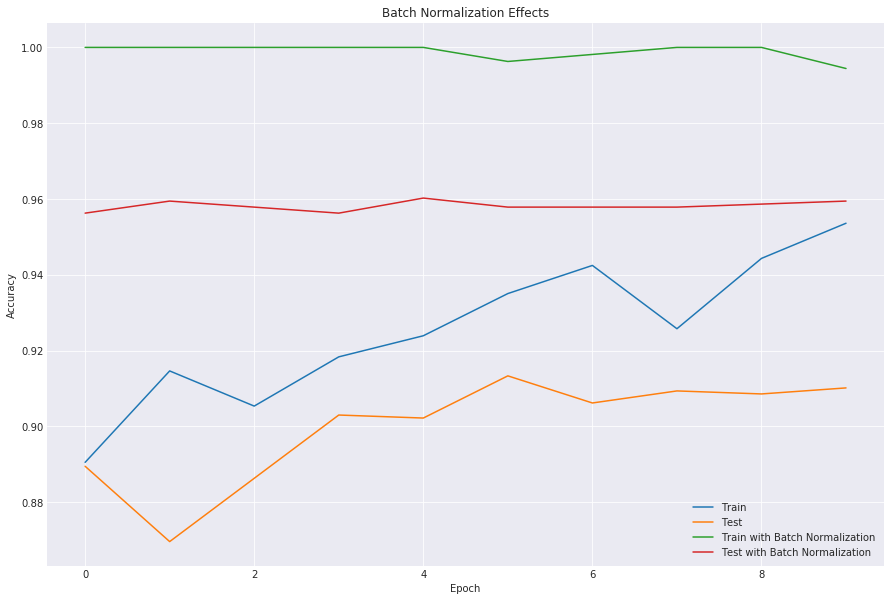

In [70]:
# Call compare_acc_histories passing in both model histories
compare_histories_acc(history1, history2)

### Sklearn recap

```python
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

tree = DecisionTreeClassifier()

params = {'max_depth':[3,None], 'max_features':range(1,4), 'min_samples_leaf': range(1,4)} 

tree_cv = RandomizedSearchCV(tree, params, cv=5)
tree_cv.fit(X,y)

# Print the best parameters
print(tree_cv.best_params_)
```

### Turn a Keras model int a Sklearn estimator

```python
# Function that creates a model 
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(16, input_shape=(2,), acitivation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy')
    return model

# Import sklearn wrapper from keras
from keras.wrappers.scikit_learn import KerasClassifier

# Create a model as a sklearn estimator
model = KerasClassifier(build_fn=create_model, epochs=6, batch_size=16) 

```

### Cross-validation

```python 
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Check how your keras model performs with 5 fold classification
kfold = cross_val_score(model, X, y, cv=5)

# Print mean accuracy per fold
kfold.mean()

# Print the standard deviation per fold
kfold.std()
```

### Tips for neural networks hyperparameter tuning
- Random search is preferred over grid search
- Don't use many epochs
- Use a smaller sample of your dataset
- Play with batch sizes, activations, optimizers and learning rates
### Random search on Keras models
```python
# Define a series of parameters
params = dict(optimizer=['sgd','adam'], epochs=3,
              batch_size=[5,10,20], activation=['relu', 'tanh'])

# Create a random search cv object and fit it to the data
random_search = RandomizedSearchCV(model, params_dist=params, cv=3)

random_search_results = random_search.fit(X,y)

# Print results 
print('Best: %f using %s'.format(random_search_results.best_score_,
                                 random_search_results.best_params_))

def create_model(nl=1,nn=256):
    model = Sequential()
    model.add(Dense(16, input_shape=(2,), activation='relu'))
    
    # Add as many hidden layers as specified in bl
    for i in range(nl):
        # Layers have nn neurons
        model.add(Dense(nn, activation='relu')
               
     # End defining and compiling your model...
                  
# Define parameters, named just like in create_model()
params = dict(nl=[1,2,9], nn=[128,256,1000])
                  
# Repeat the random search

# Print results...
                  
```